# Libraries Required

In [7]:
%%capture --no-stderr
%pip install -U --quiet langchain-community langchain_openai tavily-python langgraph

In [6]:
! pwd

/home/sahane/MultiAgent/maven-course-old/assignments/week_02/proposal_generation_agent


In [46]:
! echo OPENAI_API_KEY= 'Your_OPENAI_API_KEY' > .env
! echo TAVILY_API_KEY='YOUR_TAVILY_API_KEY' >> .env

# Setup Required APIs

In [3]:
import getpass
import os
from dotenv import load_dotenv
from langchain.llms import OpenAI


# Load environment variables from .env file
load_dotenv()
# os.environ["LANGCHAIN_PROJECT"] = "LlamaIndexworkflow"

VERSION = '1.1_rc3'
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT") + f" - v. {VERSION}"

In [4]:
LANGCHAIN_TRACING_V2=True
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")

# Imports

In [5]:
from typing import Literal
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage, AIMessage
from langchain.tools import tool


In [ ]:
! pip install -r requirements.txt

In [ ]:
#pip install arize-phoenix
# python3 -m phoenix.server.main serve

1.

In [ ]:
# ! pip install "llama-index-core>=0.10.43" "openinference-instrumentation-llama-index>=2" "opentelemetry-proto>=1.12.0" arize-phoenix-otel

In [72]:
# PHOENIX_CLIENT_HEADERS='api_key=74761878030f5f87555:da7d543'
# PHOENIX_COLLECTOR_ENDPOINT='https://app.phoenix.arize.com'

Observability

In [89]:
# from opentelemetry.sdk import trace as trace_sdk
# from opentelemetry.sdk.trace.export import SimpleSpanProcessor
# from opentelemetry.exporter.otlp.proto.http.trace_exporter import (
#     OTLPSpanExporter as HTTPSpanExporter,
# )
# from openinference.instrumentation.llama_index import LlamaIndexInstrumentor


# ## Add Phoenix API Key for tracing
# PHOENIX_API_KEY = "74761878030f5f87555:da7d543"
# os.environ["OTEL_EXPORTER_OTLP_HEADERS"] = f"api_key={PHOENIX_API_KEY}"

# os.environ["OTEL_EXPORTER_OTLP_HEADERS"] = "api_key=74761878030f5f87555:da7d543"
# os.environ["PHOENIX_CLIENT_HEADERS"] = "api_key=74761878030f5f87555:da7d543"
# os.environ["PHOENIX_COLLECTOR_ENDPOINT"] = "https://app.phoenix.arize.com"
  

# # Add Phoenix
# span_phoenix_processor = SimpleSpanProcessor(
#     HTTPSpanExporter(endpoint="https://app.phoenix.arize.com/v1/traces")
# )

# # Add them to the tracer
# tracer_provider = trace_sdk.TracerProvider()
# tracer_provider.add_span_processor(span_processor=span_phoenix_processor)

# # Instrument the application
# LlamaIndexInstrumentor().instrument(tracer_provider=tracer_provider)

Attempting to instrument while already instrumented


In [13]:
# from openinference.instrumentation.llama_index import LlamaIndexInstrumentor

# # Uninstrument LlamaIndex to stop tracing
# LlamaIndexInstrumentor().uninstrument()


Attempting to uninstrument while already uninstrumented


In [26]:
# conda update -n base -c defaults conda

In [ ]:
# ! conda install -c conda-forge ipykernel --update-deps

In [8]:
import nest_asyncio
nest_asyncio.apply()

In [9]:
import asyncio
import importlib
import sys
sys.path.append('./assignments/week_02/proposal_generation_agent/')
from workflowLlamaIndex.CRAGLlamaIndexWorkflow import CorrectiveRAGLlamIndexWorkflow
# importlib.reload(workflowLlamaIndex.CRAGLlamaIndexWorkflow)
from workflowLlamaIndex.CRAGLlamaIndexWorkflow import run_workflow

In [10]:
import asyncio

async def main():
    return await run_workflow("what are the main topics in EU ACT?")
    # return await run_workflow("where the hallucination is more harmful?")

# Get the current event loop; if there isn't one, it will create a new one
loop = asyncio.get_event_loop()

# Check if the loop is already running
if not loop.is_running():
    response = loop.run_until_complete(main())
else:
    response = await main()  # This should be used in an async environment

# If you're in a synchronous block and the loop is running, use create_task or ensure_future
# response = asyncio.create_task(main())  # This will not block and will return a Future object

print(response)


Workflow initialized.

Workflow run completed.


The main topics in the EU AI Act include the governance of AI systems, the development of digital skills, the evolving typology of AI value chains, potential amendments to regulations, promoting AI literacy and public awareness, facilitating the development of common criteria, cooperation with other Union institutions, and effective cooperation with third countries and international organizations.


In [229]:
# @tool
# async def Llamarag(question: str) -> str:
#     """ Only use this tool to retrieve research relevant information from the knowledge base."""
#     import asyncio   
#     # Get the current event loop; if there isn't one, it will create a new one
#     loop = asyncio.get_event_loop()
#     async def main():
#         response=await run_workflow(question)
#         return response

#     # Check if the loop is already running
#     if not loop.is_running():
#         return loop.run_until_complete(main())
#     else:
#         return main()  # This should be used in an async environment

# # If you're in a synchronous block and the loop is running, use create_task or ensure_future
# # response = asyncio.create_task(main())  # This will not block and will return a Future object

In [11]:
from langchain.llms import OpenAI
from langchain.tools import tool
from langchain_core.messages import ToolMessage

@tool
async def Llamarag(question: str) -> str:
    """Retrieve information from the knowledge base ONLY if about EU ACT."""
    # response = "Hallucinations are generally considered more harmful when they are associated with psychiatric illness or neurological conditions, as they can be symptoms of underlying health issues. In these cases, hallucinations can lead to distress, confusion, and impaired functioning. It is important to address hallucinations that are part of a psychiatric or neurological disorder promptly to prevent potential negative consequences."
    response= await run_workflow(question)
    # Ensure the response is wrapped in the framework's expected message format
    return str(response)#{'messages' :[AIMessage(content=response)]}#FunctionMessage(content=str(response), name="Llamarag")
    # return FunctionMessage(content=str(response), last_message.additional_kwargs["function_call"]["name"]


In [232]:
# @tool
# async def Llamarag(question: str) -> FunctionMessage:
#     """
#     Only use this tool to retrieve research relevant information from the knowledge base.
#     """
#     try:
#         response = await run_workflow(question)
#         response_content = str(response)
#         return FunctionMessage(content=response_content, name="Llamarag")
#     except Exception as e:
#         # Log the exception or handle it as required by your system's practices
#         return FunctionMessage(content=f"Error processing the request: {str(e)}", name="Llamarag")


In [12]:
from langchain_core.messages import HumanMessage, AIMessage
from langchain.schema import BaseMessage
from typing import List, TypedDict, Literal

In [26]:
# nest_asyncio.apply()

# Agent Workflow Logic

In [13]:
from langchain_core.utils.function_calling import convert_to_openai_function
# from langgraph.prebuilt import ToolNode
# from langgraph.graph import StateGraph, MessagesState, START, END
# from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# from langgraph.checkpoint.memory import MemorySaver

In [14]:
class MessagesState(TypedDict):
    messages: List[BaseMessage]

In [15]:
# We need a custom state

class SimpleAgentState(MessagesState):
    """Extends the default MessagesState to add a current answer type 
    to allow us to properly route the messages"""
    response_type: str

In [35]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolExecutor, ToolInvocation
import json

########################################################
# Setup the OpenAI model
llm_chatbot = ChatOpenAI(model="gpt-4o-mini", temperature=0)
#------------------------------------------------------
llm_retriever=ChatOpenAI(model='gpt-4o', temperature=0)
# Define the tool and wrap it correctly
tool_belt = [Llamarag]
functions = [convert_to_openai_function(t) for t in tool_belt]
tool_executor = ToolExecutor(tool_belt)

#-----------------------------------------
# retriever_tool_node = ToolNode(tool_belt)  # Ensure tools are correctly integrated

# Bind tools to the model and the config
# model = llm_retriever.bind_tools(tool_belt)  # Might need to convert or adapt tools
# model = model.with_config(tags=["final_node"])
#-------------------------------------------------------------------
#################################################################################
# RUNNABLE CHAINS
# Create our runnable chains, depending on the prompt we want to pass forward

main_prompt = """
You are a helpful agent designed to help the user get the information they requested.

You collaborate with another agent that retrieves the information for you about EU ACT.

When a user asks you a question, you will forward the query to another agent. 

You will receive information from another agent with the results of their research
into the user's query. Your task is to repeat it word by word to the user. 
Do not summarize the other agent's answer. 

You MUST cite your source documents.

"""

# Create a chain with the main prompt
main_prompt_template = ChatPromptTemplate.from_messages(
    [
        (
            "system", main_prompt
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
chat_runnable = main_prompt_template | llm_chatbot


#################################################
retriever_prompt = f"""
You are a helpful and extremely thorough agent designed to help the user get useful information ONLY about 
EU AI Act: first regulation on artificial intelligence. You only provide information that you receive from Llamarag if 
it is about the main topics in the including harmonised rules for the development, placing on the market, and use of AI in the 
European Union, a focus on safety to promote trustworthy AI adoption while protecting health, safety, and fundamental rights, 
new requirements based on the risks associated with AI systems, prohibitions of certain artificial intelligence practices, and 
a risk-based approach where the severity of rules increases with the level of risk. If the questions are not about artificial intelligence, 
return "no information found!".

ONLY consult with the the below tool(s) to and the information retrieved by the below tool(s) to construct your final answer. 

You have access to the following tool(s) ONLY to consult with:

============================
Llamarag
============================

YOUR TASK:

When a user asks you a question, FIRST you search if it is about artificial intelligence. If so, wait for generated answer by Llamarag. 

If the generated response by Llamarag is helpful for to the user's question, you use the report to return back to the chatbot agent.

You MUST ALWAYS cite your sources. 

When the user asks you for information that you don't have access to (or not about artifical intelligence), you MUST answer with: 'No information found!'.
"""
retriever_prompt_template = ChatPromptTemplate.from_messages(
    [
        "system", retriever_prompt,
        MessagesPlaceholder(variable_name="messages")

    ]

)

retrievable_runnable=retriever_prompt_template | llm_retriever.bind_tools(tool_belt).with_config(tags=["final_node"])

#------------------------------------
# We need a custom state

class SimpleAgentState(MessagesState):
    """Extends the default MessagesState to add a current answer type 
    to allow us to properly route the messages"""
    response_type: str 

#------------------------------------
# Defining our nodes
# ----------------------------------
def chatbot(state: SimpleAgentState):
    last_message = state['messages'][-1]
    
    if isinstance(last_message, HumanMessage):
        response_type = 'user_query'
    else:
        response_type = 'agent_response'

    invoke_input = {'messages': state['messages'], 'response_type': response_type}
    response = chat_runnable.invoke(invoke_input)
    
    print()
    print('response by chat_runnable agent node:\n ', response)
    print()

    return {'messages': state['messages'] + [response], 'response_type': response_type}

#--------------------------------------------
def retriever(state: SimpleAgentState):
    # Run a retrieval query on the conversation state
    
    
    response=retrievable_runnable.invoke(state["messages"])
    
    print("response by retriverable_runneble agent node:\n ", response)
    print()
    # print('response by retreiver:', response)
    # current_response_type=state['response_type']

    output={"messages": state['messages']+[response], "response_type": 'agent_response'}
    # print()
    # print("response by retriverable_runneble agent node: ", output)
    # print()

    return output

async def retriever_tool(state: SimpleAgentState):
    last_message = state["messages"][-1]
    print('Here retriever_tool:', last_message)
    if isinstance(last_message, AIMessage) and last_message.additional_kwargs:
        tool_calls = last_message.additional_kwargs.get('tool_calls', [])
        if tool_calls:
            new_messages=[]
            tool_call = tool_calls[0]
            tool_name = tool_call['function']['name']
            tool_arguments = json.loads(tool_call['function']['arguments'])
            
            action = ToolInvocation(
                tool=tool_name,
                tool_input=tool_arguments,
            )

            response = await tool_executor.ainvoke(action)
            # function_message = FunctionMessage(content=str(response), name=action.tool)
            # return {"messages": state["messages"] + [function_message]}
            # Create a ToolMessage for each tool call
            tool_message = ToolMessage(
                content=str(response),
                tool_call_id=tool_call['id'],
                name=tool_name
            )
            new_messages.append(tool_message)

            return {"messages": state["messages"] + new_messages}
    
    # If no tool call was found or executed, return the original state
    return state
###################################################################
# Define the graph
##################################################################


def rout_query(state: MessagesState) -> Literal["tools", "end"]:
    response_type = state.get('response_type')

    if response_type == 'user_query':
        # Routing to the query retriever
        return 'query'
    else:
        return "end"


def route_tools(state: SimpleAgentState) -> Literal["tools", "success", "no_answer"]:
    if isinstance(state['messages'][-1], AIMessage):
        ai_message = state['messages'][-1]
        if ai_message.additional_kwargs.get('tool_calls'):
            return "tools"
        elif 'no information found' in ai_message.content.lower():
            print('no information found!')
            return "no_answer"
        else:
            return "success"
    return "success"  # Default case if the last message is not an AIMessage

########################################################################

# # Compile the graph with a checkpointer for state persistence
# # checkpointer = MemorySaver()
# graph = workflow.compile()#checkpointer=checkpointer)
workflow = StateGraph(SimpleAgentState)

workflow.add_node("chatbot", chatbot)
workflow.add_node("retriever", retriever)
workflow.add_node("retriever_tools", retriever_tool)

workflow.add_edge(START, "chatbot")

workflow.add_conditional_edges(
    "chatbot",
    rout_query,
    {'query': "retriever", "end": END}
)

workflow.add_conditional_edges(
    "retriever",
    route_tools,
    {"tools": "retriever_tools", "success": "chatbot", "no_answer": END},
)

workflow.add_edge("retriever_tools", "chatbot")

graph = workflow.compile()


/tmp/ipykernel_128246/3963357813.py:16: LangGraphDeprecationWarning: ToolExecutor is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  tool_executor = ToolExecutor(tool_belt)


In [36]:
import asyncio

# Assuming 'graph' is your defined graph
async def run_graph():
    result = await graph.ainvoke({"messages": [HumanMessage(content="when the hallucination by llm is more harmful?")]})
    # result = await graph.ainvoke({"messages": [HumanMessage(content="how is the weather?")]})
    return result

# Run the async function
sa = asyncio.run(run_graph())


response by chat_runnable agent node:
  content='I will forward your query to another agent for more information. Please hold on for a moment. \n\n[Query forwarded to another agent.]' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 122, 'total_tokens': 149, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-d3e9185d-3c04-4a45-872e-eb2dc296a3cf-0' usage_metadata={'input_tokens': 122, 'output_tokens': 27, 'total_tokens': 149}

response by retriverable_runneble agent node:
  content='' additional_kwargs={'tool_calls': [{'id': 'call_ktkegYndlBJxKsDtpRXCphmg', 'function': {'arguments': '{"question":"when the hallucination by llm is more harmful?"}', 'name': 'Llamarag'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'comp

/tmp/ipykernel_128246/3963357813.py:153: LangGraphDeprecationWarning: ToolInvocation is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  action = ToolInvocation(


Workflow run completed.



response by chat_runnable agent node:
  content='Hallucinations by LLMs are more harmful when they lead to the spread of misinformation, expose confidential information, create unrealistic expectations about what LLMs can do, reinforce harmful stereotypes, or lead to unjust outcomes.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 231, 'total_tokens': 275, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-79e0d2f4-bfb9-470a-94c5-f769728b5c94-0' usage_metadata={'input_tokens': 231, 'output_tokens': 44, 'total_tokens': 275}



In [37]:
sa

{'messages': [HumanMessage(content='when the hallucination by llm is more harmful?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='I will forward your query to another agent for more information. Please hold on for a moment. \n\n[Query forwarded to another agent.]', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 122, 'total_tokens': 149, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-d3e9185d-3c04-4a45-872e-eb2dc296a3cf-0', usage_metadata={'input_tokens': 122, 'output_tokens': 27, 'total_tokens': 149}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ktkegYndlBJxKsDtpRXCphmg', 'function': {'arguments': '{"question":"when the hallucination by llm is more harmful?"}', 'name': 'Llamarag'}, 'type': 

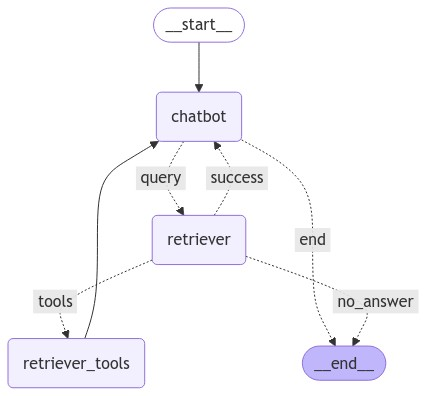

In [38]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [46]:
# workflow.add_edge("tools", 'agent')

# Initialize memory to persist state between graph runs
checkpointer = MemorySaver()

# Finally, we compile it!
# This compiles it into a LangChain Runnable,
# meaning you can use it as you would any other runnable.
# Note that we're (optionally) passing the memory when compiling the graph
appgraph = workflow.compile(checkpointer=checkpointer)

# Use the Runnable
# final_state = app.invoke(
#     {"messages": [HumanMessage(content="where the hallucination is more harmful?")]},
#     config={"configurable": {"thread_id": 42}}
# )
# final_state["messages"][-1].content
# where the hallucination is more harmful?//hold on! what areas exactly!//my confusion! what are these areas?my confusion! what are these areas?
async def run_graph():
    final_state = await appgraph.ainvoke(
        {"messages": [HumanMessage(content="how is the weather in London?")]}, 
    config={"configurable": {"thread_id": 42}}
    )
    return final_state['messages'][-1].content
#  Get the current event loop; if there isn't one, it will create a new one
loop = asyncio.get_event_loop()
# Check if the loop is already running
if not loop.is_running():
    response = loop.run_until_complete(run_graph())
else:
    response = await run_graph() 



response by chat_runnable agent node:
  content="I'm unable to provide real-time weather information. However, I can help you with other inquiries or information. Would you like to ask something else?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 118, 'total_tokens': 147, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-2ff43930-d3e6-4cd3-9e7c-7a090e56d0ef-0' usage_metadata={'input_tokens': 118, 'output_tokens': 29, 'total_tokens': 147}

response by retriverable_runneble agent node:
  content='No information found!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 400, 'total_tokens': 405, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_

In [42]:
response

'Hallucinations are generally considered more harmful when they are associated with pathological conditions such as psychosis.'

In [ ]:
response

'No information found!'

In [48]:
# import nest_asyncio
# nest_asyncio.apply()

import asyncio
# from langchain.schema import HumanMessage
checkpointer = MemorySaver()
LlamaLanggraph = workflow.compile(checkpointer=checkpointer)
async def run_graph():
    
    config = {
        "configurable": {"thread_id": "1"},
        "recursion_limit": 50
    }

    input_prompt = """where the hallucination is more harmful?"""
    messages = [HumanMessage(content=input_prompt)]

    result = await LlamaLanggraph.ainvoke(
        {"messages": messages},
        config
    )
    return result

async def main():
    try:
        result = await run_graph()
        print("Result:", result)
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()
asyncio.run(main())


response by chat_runnable agent node:
  content='I will forward your query to another agent for more information. Please hold on for a moment. \n\n[Query forwarded to another agent.]' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 119, 'total_tokens': 146, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-cb4b48d8-908c-4bee-a9d8-8e7388371ba6-0' usage_metadata={'input_tokens': 119, 'output_tokens': 27, 'total_tokens': 146}

response by retriverable_runneble agent node:
  content='' additional_kwargs={'tool_calls': [{'id': 'call_0etMTEOJrgSf7UhBpbgL71Dh', 'function': {'arguments': '{"question":"Where is hallucination more harmful in AI systems?"}', 'name': 'Llamarag'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'

/tmp/ipykernel_128246/3963357813.py:153: LangGraphDeprecationWarning: ToolInvocation is deprecated as of version 0.2.0 and will be removed in 0.3.0. Use langgraph.prebuilt.ToolNode instead.
  action = ToolInvocation(



Workflow initialized.

Workflow run completed.



response by chat_runnable agent node:
  content='Hallucination is more harmful in AI systems when it leads to the spread of misinformation, especially in news-generating algorithms.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 208, 'total_tokens': 233, 'completion_tokens_details': {'reasoning_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None} id='run-2c4f5d06-7da9-4de7-9a2f-891cab96c445-0' usage_metadata={'input_tokens': 208, 'output_tokens': 25, 'total_tokens': 233}

Result: {'messages': [HumanMessage(content='where the hallucination is more harmful?', additional_kwargs={}, response_metadata={}), AIMessage(content='I will forward your query to another agent for more information. Please hold on for a moment. \n\n[Query forwarded to anothe

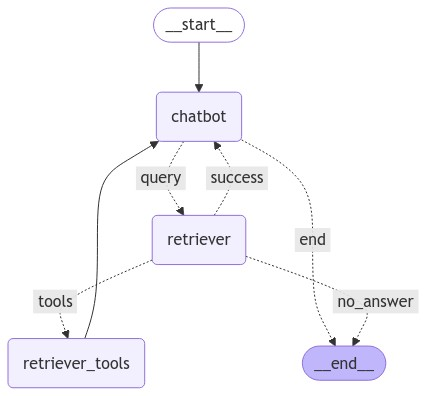

In [49]:
from IPython.display import Image, display

try:
    display(Image(LlamaLanggraph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Collaboration Graph

In [156]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_openai import ChatOpenAI
from langchain_core.messages import (
    BaseMessage,
    HumanMessage,
    ToolMessage,
    AIMessage,
)




# This defines the object that is passed between each node
# in the graph. We will create different nodes for each agent and tool
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

In [ ]:
    
async def call_model(state):
    messages = state["messages"]
    response = await model.ainvoke(messages)
    return {"messages": [response]}


async def call_tool(state):
    last_message = state["messages"][-1]

    action = ToolInvocation(
        tool=last_message.additional_kwargs["function_call"]["name"],
        tool_input=json.loads(
            last_message.additional_kwargs["function_call"]["arguments"]
        ),
    )
    print()
    print(last_message.additional_kwargs["function_call"]["name"])
    print()

    response = await tool_executor.ainvoke(action)

    function_message = FunctionMessage(content=str(response), name=action.tool)

    return {"messages": [function_message]}


###10. GRAPG CREATION WITH HELPFULNESS EVALUATION
# should_continue CHECKS IF THE LAST MASSAGE IN THE STATE IS TO CONTINUE (additional_kwargs EXISTS) OR END.
# THE add_conditional_edges() method IS ORIGINATED FROM THIS REPONSE, EITHER TRANSITION TO ACTION NODE OR END.


def should_continue(state):
    last_message = state["messages"][-1]

    if "function_call" not in last_message.additional_kwargs:
        return "end"

    return "continue"


async def check_helpfulness(state):
    initial_query = state["messages"][0]
    final_response = state["messages"][-1]

    # adding artificial_loop

    if len(state["messages"]) > 10:
        return "END"

    prompt_template = """\
  Given an initial query and a final response, determine if the final response is extremely helpful or not. Please indicate helpfulness with a 'Y'\
  and unhelpfulness as an 'N'.

  Initial Query:
  {initial_query}

  Final Response:
  {final_response}"""

    prompt_template = PromptTemplate.from_template(prompt_template)

    helpfulness_check_model = ChatOpenAI(model="gpt-4")

    helpfulness_check_chain = (
        prompt_template | helpfulness_check_model | StrOutputParser()
    )

    helpfulness_response = await helpfulness_check_chain.ainvoke(
        {"initial_query": initial_query, "final_response": final_response}
    )

    if "Y" in helpfulness_response:
        print("helpful!")
        return "end"

    else:
        print(" Not helpful!!")
        return "continue"


def dummy_node(state):
    return


### 11. SETTING THE GRAPH WORKFLOW:
# 1. AN INSTANCE OF THE STATEGRAPH CREATED OF THE TYPE AgentState. THREE NODES ADDED TO THE GRAPH USING add_node() method:
# 1.1 THE "agent" NODE IS ASSOCIATED WITH THE call_model FUNCTION.
# 1.2 THE "action" NODE IS ASSOCIATED WITH THE call_tool FUNCTION.
# 1.3 THE "passthrough" NODE IS A CUSTOM NODE THAT IS ASSOCIATED WITH CHECKING HELPFULNESS.
# 1.5 THE CONDITIONAL EDGES
# 1.5.1 BETWEEN agent NODE AND THE OTHER TWO NODES TO EITHER action NODE OR passthrough NODE
# 1.5.2 BETWEEN passthrough NODE AND agen NODE OR END NODE.
# 1.5.3 BETWEEN agent AND action NODES AS MODEL HAS ACCESS TO TOOLS FOR RESPONSE GENERATION.
def get_state_update_bot():
    workflow = StateGraph(AgentState)

    workflow.add_node("agent", call_model)  # agent node has access to llm
    workflow.add_node("action", call_tool)  # action node has access to tools
    workflow.set_entry_point("agent")
    workflow.add_conditional_edges(
        "agent",
        should_continue,
        {
            "continue": "action",  # tools
            "end": END,
        },
    )
    workflow.add_edge("action", "agent")  # tools
    state_update_bot = workflow.compile()

    return state_update_bot

# Visualize Agent Workflow

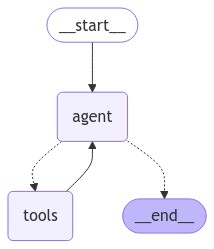

In [170]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [171]:
import pprint
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)
config = {"configurable": {"thread_id": "1"},
          "recursion_limit": 50 }

input_prompt = """ where the hallucination is more harmful?
"""

# Run the graph
graph.invoke(
    {"messages": [HumanMessage(content=input_prompt)]}, config)

/home/sahane/anaconda3/envs/aie3/lib/python3.11/site-packages/langgraph/utils/runnable.py:167: RuntimeWarning: coroutine 'RunnableBindingBase.ainvoke' was never awaited
  ret = context.run(self.func, input, **kwargs)


AttributeError: 'FunctionMessage' object has no attribute 'tool_calls'

# Results

In [153]:
import pprint

input_prompt = """You are an AI assistant tasked with creating a proposal for a new weight loss drug to pitch to Bausch Health.
Use the Tavily search tool to gather information about Bausch Health and the pharmaceutical industry.

Your proposal should include:
1. Executive Summary
2. Company Overview (Bausch Health)
3. Product Description
4. Market Analysis
5. Marketing Strategy
6. Financial Projections
   - Include estimated production costs
   - Projected sales and revenue
7. Conclusion

Ensure your proposal is well-structured, informative, and persuasive.
"""

# Run the graph
final_state = graph.invoke(
    {"messages": [HumanMessage(content=input_prompt)]},
    config={"configurable": {"thread_id": 42}}
)

In [154]:
print(final_state["messages"][-1].content)

### Proposal for a New Weight Loss Drug to Bausch Health

#### 1. Executive Summary
This proposal outlines the development and market introduction of a new weight loss drug by Bausch Health. The drug aims to address the growing demand for effective weight management solutions. This document includes a comprehensive overview of Bausch Health, a detailed product description, market analysis, marketing strategy, financial projections, and a conclusion.

#### 2. Company Overview (Bausch Health)
Bausch Health Companies Inc. is a global, diversified pharmaceutical company headquartered in Laval, Canada. The company develops, manufactures, and markets a wide range of products in various therapeutic areas, including gastroenterology, hepatology, neurology, dermatology, and eye health. Bausch Health is committed to improving patients' lives by delivering innovative and effective health solutions.

#### 3. Product Description
The proposed weight loss drug is designed to aid in significant weight